In [1]:
import torch
import torch.autograd as autograd         # computation graph
from torch import Tensor                  # tensor node in the computation graph
import torch.nn as nn                     # neural networks
import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker
from torch.nn.parameter import Parameter

import numpy as np
import time
from pyDOE import lhs         #Latin Hypercube Sampling
import scipy.io

from smt.sampling_methods import LHS
from scipy.io import savemat

#Set default dtype to float32
torch.set_default_dtype(torch.float)

#PyTorch random number generator
torch.manual_seed(1234)

# Random number generators in other libraries
np.random.seed(1234)

device = torch.device('cpu')

print(device)

import matplotlib.pyplot as plt

if device == 'cuda': 
    print(torch.cuda.get_device_name())

cpu


In [2]:
class Sequentialmodel_stan(nn.Module):
    
    def __init__(self,layers):
        super().__init__() #call __init__ from parent class 
              
    
        self.activation = nn.Tanh()
        self.loss_function = nn.MSELoss(reduction ='mean')
        
        'Initialise neural network as a list using nn.Modulelist'  
        self.linears = nn.ModuleList([nn.Linear(layers[i], layers[i+1]) for i in range(len(layers)-1)])
        
        # std = gain * sqrt(2/(input_dim+output_dim))
        
        for i in range(len(layers)-1):
            nn.init.xavier_normal_(self.linears[i].weight.data, gain=1.0)
            # set biases to zero
            nn.init.zeros_(self.linears[i].bias.data) 
        
        self.beta = Parameter(torch.ones((50,len(layers)-2)))
        self.beta.requiresGrad = True
        
        self.iter = 0
        
              
    'forward pass'
    def forward(self,x):
        if torch.is_tensor(x) != True:         
            x = torch.from_numpy(x)                
        
        u_b = torch.from_numpy(ub).float().to(device)
        l_b = torch.from_numpy(lb).float().to(device)
                      
        #preprocessing input 
        x = 2.0*(x - l_b)/(u_b - l_b) - 1.0 #feature scaling
        
        #convert to float
        a = x.float()
        
        for i in range(len(layers)-2):
            z = self.linears[i](a)
            a = self.activation(z) + self.beta[:,i]*z*self.activation(z)
            
        a = self.linears[-1](a) 
         
        return a
    
#-----------------------------------------------------------------------------------
class Sequentialmodel_tanh(nn.Module):
    
    def __init__(self,layers):
        super().__init__() #call __init__ from parent class 
              
    
        self.activation = nn.Tanh()
        self.loss_function = nn.MSELoss(reduction ='mean')
        
        'Initialise neural network as a list using nn.Modulelist'  
        self.linears = nn.ModuleList([nn.Linear(layers[i], layers[i+1]) for i in range(len(layers)-1)])
        
        # std = gain * sqrt(2/(input_dim+output_dim))
        
        for i in range(len(layers)-1):
            nn.init.xavier_normal_(self.linears[i].weight.data, gain=1.0)
            # set biases to zero
            nn.init.zeros_(self.linears[i].bias.data) 
             
      
              
    'forward pass'
    def forward(self,x):
        if torch.is_tensor(x) != True:         
            x = torch.from_numpy(x)                
        
        u_b = torch.from_numpy(ub).float().to(device)
        l_b = torch.from_numpy(lb).float().to(device)
                      
        #preprocessing input 
        x = 2.0*(x - l_b)/(u_b - l_b) - 1.0 #feature scaling
        
        #convert to float
        a = x.float()
        
        for i in range(len(layers)-2):
            z = self.linears[i](a)
            a = self.activation(z) 
            
        a = self.linears[-1](a) 
         
        return a
    
#---------------------------------------------------------------------------
class Sequentialmodel_atanh(nn.Module):
    
    def __init__(self,layers,n_val):
        super().__init__() #call __init__ from parent class 
              
    
        self.activation = nn.Tanh()
        self.loss_function = nn.MSELoss(reduction ='mean')
        
        'Initialise neural network as a list using nn.Modulelist'  
        self.linears = nn.ModuleList([nn.Linear(layers[i], layers[i+1]) for i in range(len(layers)-1)])
        
        # std = gain * sqrt(2/(input_dim+output_dim))
        
        for i in range(len(layers)-1):
            nn.init.xavier_normal_(self.linears[i].weight.data, gain=1.0)
            # set biases to zero
            nn.init.zeros_(self.linears[i].bias.data) 
        
        self.alpha = Parameter(torch.ones((50,len(layers)-2)))
        self.alpha.requiresGrad = True
        
        self.n = torch.tensor(n_val)
        
              
    'forward pass'
    def forward(self,x):
        if torch.is_tensor(x) != True:         
            x = torch.from_numpy(x)                
        
        u_b = torch.from_numpy(ub).float().to(device)
        l_b = torch.from_numpy(lb).float().to(device)
                      
        #preprocessing input 
        x = (x - l_b)/(u_b - l_b) #feature scaling
        
        #convert to float
        a = x.float()
        
        for i in range(len(layers)-2):
            z = self.linears[i](a)
            a = self.activation(self.n*self.alpha[:,i]*z)
            
        a = self.linears[-1](a) 
         
        return a
#--------------------------------------------------------------------------------------------
class Sequentialmodel_swish(nn.Module):
    
    def __init__(self,layers):
        super().__init__() #call __init__ from parent class 
              
    
        self.activation = nn.Sigmoid()
        self.loss_function = nn.MSELoss(reduction ='mean')
        
        'Initialise neural network as a list using nn.Modulelist'  
        self.linears = nn.ModuleList([nn.Linear(layers[i], layers[i+1]) for i in range(len(layers)-1)])
        
        # std = gain * sqrt(2/(input_dim+output_dim))
        
        for i in range(len(layers)-1):
            nn.init.xavier_normal_(self.linears[i].weight.data, gain=1.0)
            # set biases to zero
            nn.init.zeros_(self.linears[i].bias.data) 
        
        self.beta = Parameter(torch.ones((50,len(layers)-2)))
        self.beta.requiresGrad = True
        
              
    'forward pass'
    def forward(self,x):
        if torch.is_tensor(x) != True:         
            x = torch.from_numpy(x)                
        
        u_b = torch.from_numpy(ub).float().to(device)
        l_b = torch.from_numpy(lb).float().to(device)
                      
        #preprocessing input 
        x = (x - l_b)/(u_b - l_b) #feature scaling
        
        #convert to float
        a = x.float()
        
        for i in range(len(layers)-2):
            z = self.linears[i](a)
            a = z*self.activation(self.beta[:,i]*z)
            
        a = self.linears[-1](a) 
         
        return a

#--------------------------------------------------------------------------------------
class Sequentialmodel_rowdy(nn.Module):
    
    def __init__(self,layers,n_val,rowdy_terms):
        super().__init__() #call __init__ from parent class 
              
    
        self.activation = nn.Tanh()
        self.loss_function = nn.MSELoss(reduction ='mean')
        
        'Initialise neural network as a list using nn.Modulelist'  
        self.linears = nn.ModuleList([nn.Linear(layers[i], layers[i+1]) for i in range(len(layers)-1)])
        
        # std = gain * sqrt(2/(input_dim+output_dim))
        
        for i in range(len(layers)-1):
            nn.init.xavier_normal_(self.linears[i].weight.data, gain=1.0)
            # set biases to zero
            nn.init.zeros_(self.linears[i].bias.data) 
        
        self.omega1 = Parameter(torch.ones((len(layers)-2,1))) 
        self.omega1.requiresGrad = True
        
        
        self.alpha = Parameter(torch.zeros(rowdy_terms,len(layers)-2))
        self.alpha.requiresGrad = True
        
        self.omega = Parameter((1/n_val)*torch.ones(rowdy_terms,len(layers)-2))
        self.omega.requiresGrad = True
        
        self.n = torch.tensor(n_val)

                      
    'forward pass'
    def forward(self,x):
        if torch.is_tensor(x) != True:         
            x = torch.from_numpy(x)                
        
        u_b = torch.from_numpy(ub).float().to(device)
        l_b = torch.from_numpy(lb).float().to(device)
                      
        #preprocessing input 
        x = 2.0*(x - l_b)/(u_b - l_b)-1.0 #feature scaling
        
        #convert to float
        a = x.float()
        
        for i in range(len(layers)-2):
            z = self.linears[i](a)
            a = self.activation(self.omega1[i,0]*z)
            for j in range(rowdy_terms):
                a = a + self.alpha[j,i]*self.n*torch.sin((j+1)*self.n*self.omega[j,i]*z)
            
        a = self.linears[-1](a) 
         
        return a

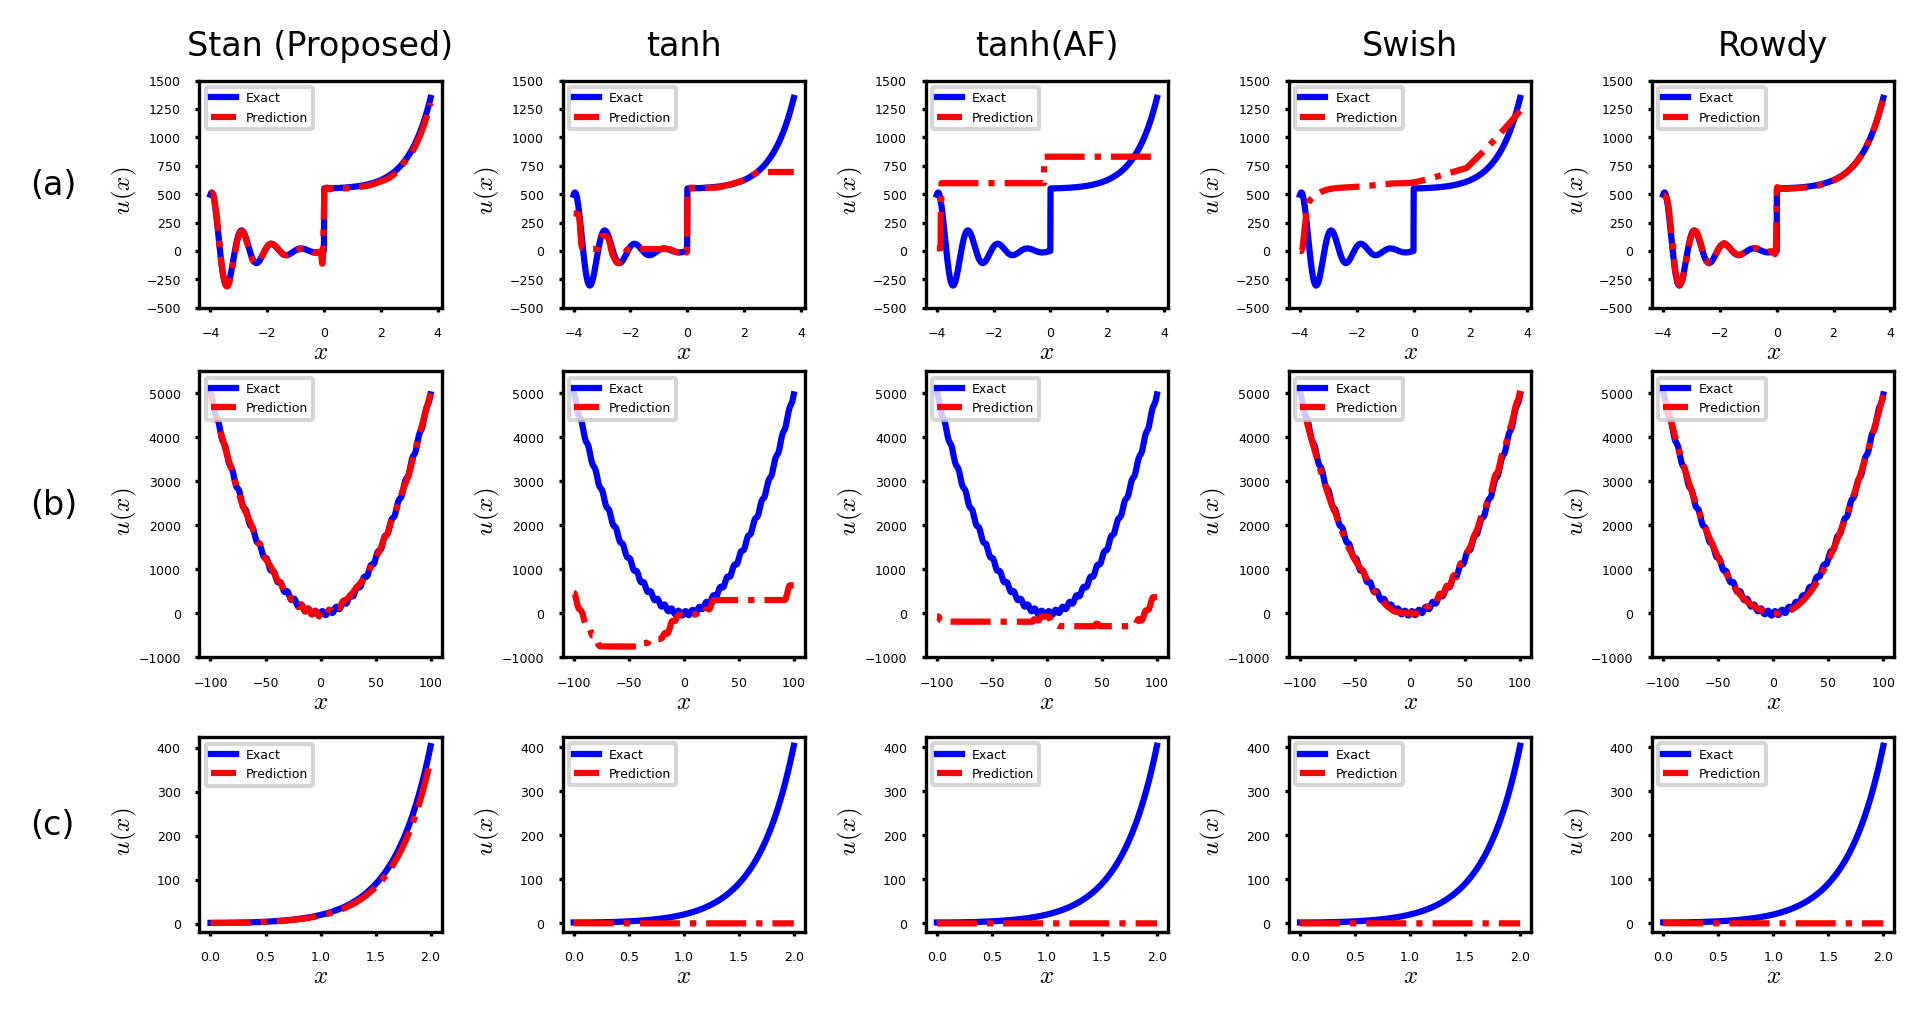

In [3]:
fig, axs = plt.subplots(3,5)
level_ind = 2

levels = ["low","medium","high"]
level = levels[level_ind]

rep_num = 0
scales = [1.0,10.0,50.0] #1.0,10.0,50.0
scale = scales[level_ind]

def true_disc(x): #[-4,3.75]
    y  = np.zeros((np.shape(x)[0],))
    
    y = 0.2*np.sin(6*x)*np.exp(-1*x)
    y[x>0] = 1 + 0.1*x[x>0]*np.exp(x[x>0]) + 10
    
    return scale*y


lb = np.array(-4.0)  # [-1. 0.]
ub = np.array(3.75) # [1.  0.99]

x = np.linspace(lb,ub,1000).reshape(-1,1)
y_true = true_disc(x)

x = torch.from_numpy(x)

ax = axs[0,:]

fig.dpi=300
fig.tight_layout()

folder_base = "./Regression/"

layers = np.array([1,50,50,50,50,1])
folder_names = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']
prob_name = "Regr_disc_"
plt_titles = ['Stan (Proposed)','tanh','tanh(AF)','Swish','Rowdy']

rowdy_terms = 2

PINNs = [Sequentialmodel_stan(layers),Sequentialmodel_tanh(layers),Sequentialmodel_atanh(layers,1.0),Sequentialmodel_swish(layers),Sequentialmodel_rowdy(layers,1.0,rowdy_terms)] 


for i in range(5):
    PINNs[i].load_state_dict(torch.load(folder_base + folder_names[i] + prob_name + algo_names[i] + '_' + level+'_'+str(rep_num)+'.pt'))

    y_pred = PINNs[i].forward(x).cpu().detach().numpy()
    
    ax[i].plot(x.cpu().detach().numpy(),y_true,'b',linewidth = 1.5,label = 'Exact')
    ax[i].plot(x.cpu().detach().numpy(),y_pred,'r-.',linewidth = 1.5,label = "Prediction")
    
    ax[i].set_title(plt_titles[i],fontsize=8, math_fontfamily='cm')
    
    ax[i].set_xlabel('$x$', fontsize=6, math_fontfamily='cm', labelpad=0.0)
    ax[i].set_ylabel(' $u(x)$',fontsize=6, math_fontfamily='cm', labelpad=0.0)
    
    ax[i].tick_params(axis='x', labelsize=3,length = 1)
    ax[i].tick_params(axis='y', labelsize=3,length = 1)
    
    ax[i].set_aspect(aspect = 0.004)
    
    ax[i].yaxis.set_label_coords(-0.25,0.5)
    
    ax[i].legend(prop={'size':3},loc = 'upper left')

    # ax[i].set_ylim([-300,1350])
    ax[i].set_ylim([-500.0,1500.0])
    
    
#------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------

rep_num = 1
extents = [1.0,20.0,100.0]
extent = extents[level_ind]

def true_1D_FODE(x): #True function for 1D_1 dy/dx = cos(0.01*x) BC1: y(0)=0; x \in [-100,100]
    y = extent*np.sin(x)/2 + np.square(x)/2
    return y

x = np.linspace(extent,-1.0*extent,5000).reshape(-1,1)
y_true = true_1D_FODE(x)

lb = x[0]
ub = x[-1]


x = torch.from_numpy(x)


fig.dpi=300
fig.tight_layout()

folder_base = "./1D/FODE_mod/"

layers = np.array([1,50,50,50,1]) #9 hidden layers
folder_names = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']
prob_name = "1D_FODE_"
plt_titles = ['Stan (Proposed)','tanh','tanh(AF)','Swish','Rowdy']

rowdy_terms = 2

PINNs = [Sequentialmodel_stan(layers),Sequentialmodel_tanh(layers),Sequentialmodel_atanh(layers,3.0),Sequentialmodel_swish(layers),Sequentialmodel_rowdy(layers,8.0,rowdy_terms)] 

ax = axs[1,:]

R = 0

for i in range(5):
    PINNs[i].load_state_dict(torch.load(folder_base + folder_names[i] + prob_name + algo_names[i] + '_' + level+'_'+str(rep_num)+'.pt'))

    y_pred = PINNs[i].forward(x).cpu().detach().numpy()
    
    ax[i].plot(x.cpu().detach().numpy(),y_true,'b',linewidth = 1.5,label = 'Exact')
    ax[i].plot(x.cpu().detach().numpy(),y_pred,'r-.',linewidth = 1.5,label = "Prediction")
    
    # ax[i].set_title(plt_titles[i],fontsize=8, math_fontfamily='cm')
    
    ax[i].set_xlabel('$x$', fontsize=6, math_fontfamily='cm', labelpad=0.0)
    ax[i].set_ylabel(' $u(x)$',fontsize=6, math_fontfamily='cm', labelpad=0.0)
    
    ax[i].tick_params(axis='x', labelsize=3,length = 1)
    ax[i].tick_params(axis='y', labelsize=3,length = 1)
    
    ax[i].set_aspect(aspect = 0.04)
    
    ax[i].yaxis.set_label_coords(-0.25,0.5)
    
    ax[i].legend(prop={'size':3},loc = 'upper left')

    # ax[i].set_ylim([-300,1350])
    ax[i].set_ylim([-1000.0,5500.0])
    
#------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------

rep_num = 2
coeffs1 = [1.0, 2.0, 3.0] 
coeffs2 = [-2.0, -3.0, -4.0] 

def true_1D_SODE(x): #True function for 1D_1 dy2/dx2 + dy/dx - 6y = 0; BC1: y(0)=2; BC2: dy/dx at (x=0) = -1;
    y = np.exp(coeffs1[level_ind]*x) + np.exp(coeffs2[level_ind]*x)
    return y

x = np.linspace(0,2,100).reshape(-1,1)
y_true = true_1D_SODE(x)

lb = x[0]
ub = x[-1]


x = torch.from_numpy(x)

fig.dpi=300
fig.tight_layout()

folder_base = "./1D/SODE/"

layers = np.array([1,50,50,50,50,50,50,50,50,50,1])
folder_names = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']
prob_name = "1D_SODE_"
plt_titles = ['Stan (Proposed)','tanh','tanh(AF)','Swish','Rowdy']

rowdy_terms = 2

PINNs = [Sequentialmodel_stan(layers),Sequentialmodel_tanh(layers),Sequentialmodel_atanh(layers,1.0),Sequentialmodel_swish(layers),Sequentialmodel_rowdy(layers,5.0,rowdy_terms)] 

ax = axs[2,:]

R = 0

for i in range(5):
    PINNs[i].load_state_dict(torch.load(folder_base + folder_names[i] + prob_name + algo_names[i] + '_' + level+'_'+str(rep_num)+'.pt'))

    y_pred = PINNs[i].forward(x).cpu().detach().numpy()
    
    ax[i].plot(x.cpu().detach().numpy(),y_true,'b',linewidth = 1.5,label = 'Exact')
    ax[i].plot(x.cpu().detach().numpy(),y_pred,'r-.',linewidth = 1.5,label = "Prediction")
    
    # ax[i].set_title(plt_titles[i],fontsize=8, math_fontfamily='cm')
    
    ax[i].set_xlabel('$x$', fontsize=6, math_fontfamily='cm', labelpad=0.0)
    ax[i].set_ylabel(' $u(x)$',fontsize=6, math_fontfamily='cm', labelpad=0.0)
    
    ax[i].tick_params(axis='x', labelsize=3,length = 1)
    ax[i].tick_params(axis='y', labelsize=3,length = 1)
    
    ax[i].set_aspect(aspect = 0.004)
    
    ax[i].yaxis.set_label_coords(-0.25,0.5)
    
    ax[i].legend(prop={'size':3},loc = 'upper left')

    # ax[i].set_ylim([-300,1350])
    # ax[i].set_ylim([-1000.0,5500.0])
plot_rows = ['(a)','(b)','(c)','(d)']

for i in range(3):
    axs[i,0].text(-0.7,0.5,plot_rows[i],fontsize=8,transform=axs[i,0].transAxes)

# fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.2, hspace=-0.7)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=-0.5)
plt.savefig('Num_predictions_' + level+ '.pdf', format='pdf',pad_inches=0, bbox_inches='tight')

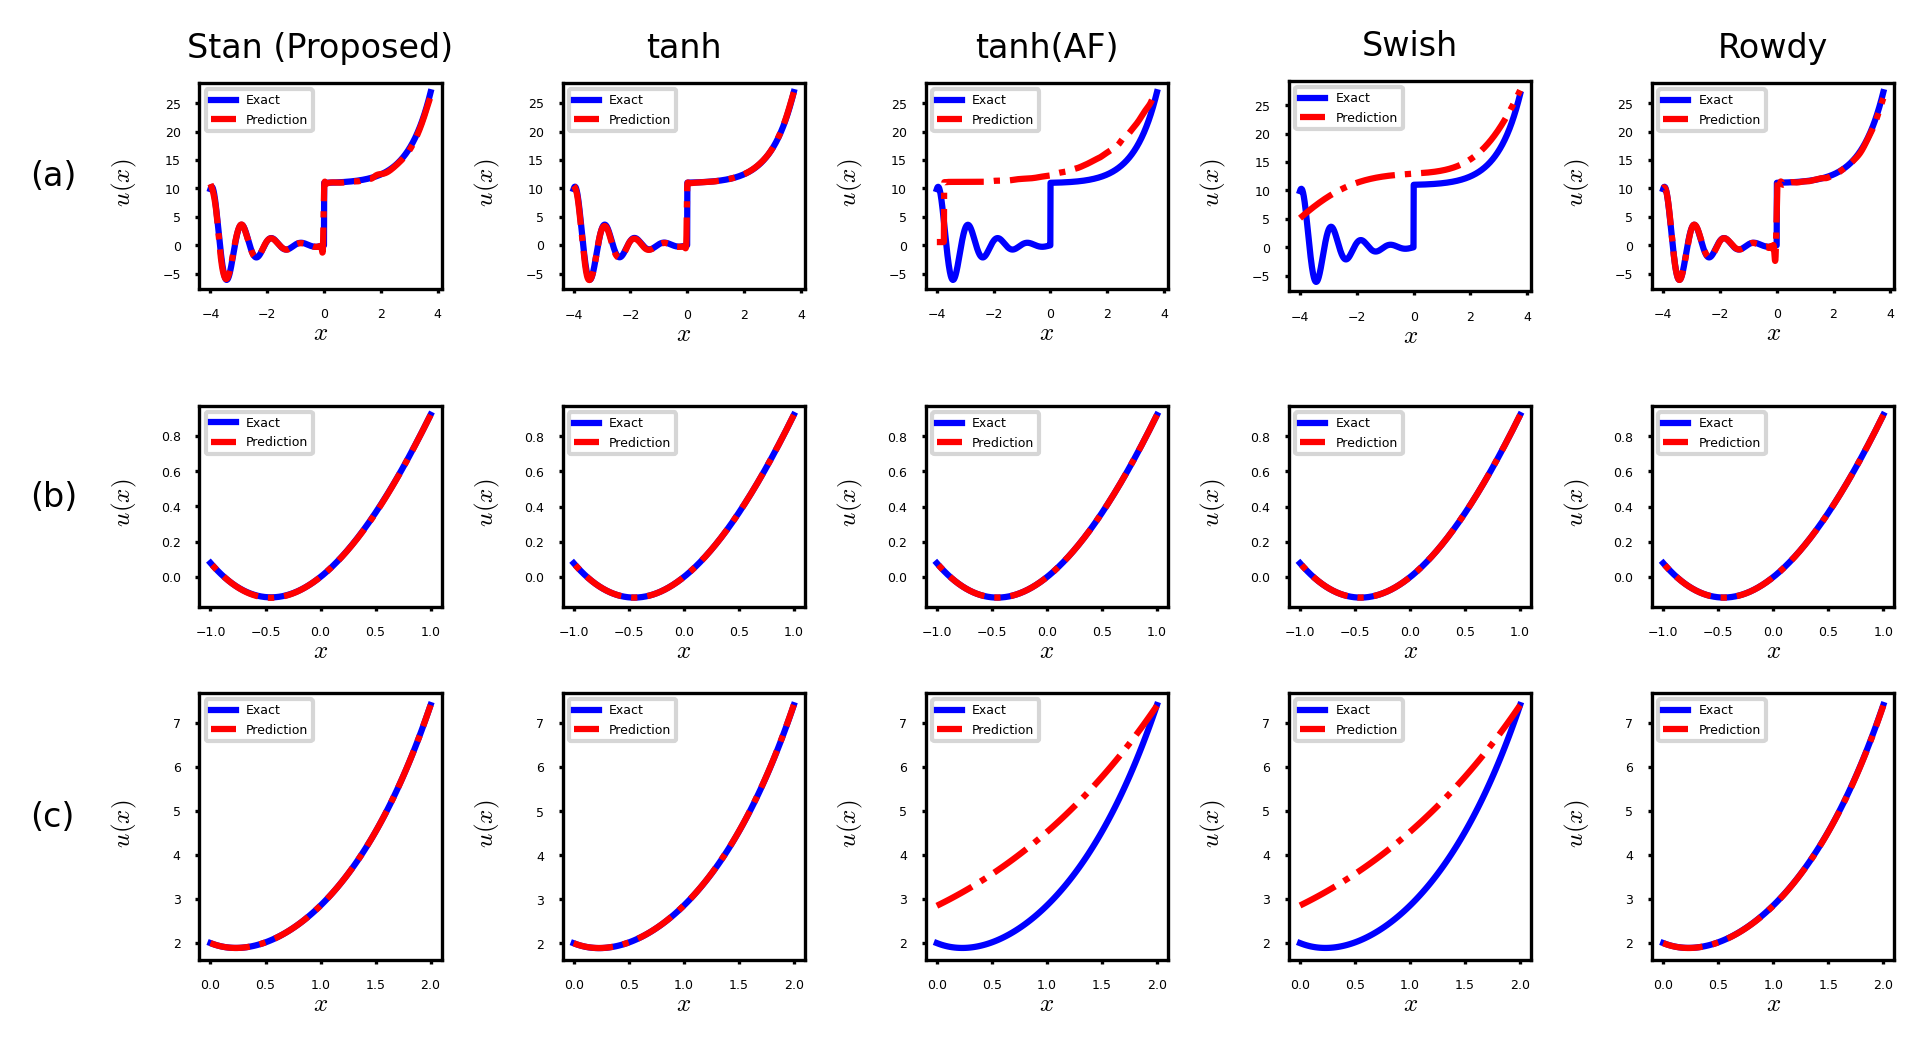

In [4]:
fig, axs = plt.subplots(3,5)
level_ind = 0

levels = ["low","medium","high"]
level = levels[level_ind]

rep_num = 0
scales = [1.0,10.0,50.0] #1.0,10.0,50.0
scale = scales[level_ind]

def true_disc(x): #[-4,3.75]
    y  = np.zeros((np.shape(x)[0],))
    
    y = 0.2*np.sin(6*x)*np.exp(-1*x)
    y[x>0] = 1 + 0.1*x[x>0]*np.exp(x[x>0]) + 10
    
    return scale*y


lb = np.array(-4.0)  # [-1. 0.]
ub = np.array(3.75) # [1.  0.99]

x = np.linspace(lb,ub,1000).reshape(-1,1)
y_true = true_disc(x)

x = torch.from_numpy(x)

ax = axs[0,:]

fig.dpi=300
fig.tight_layout()

folder_base = "./Regression/"

layers = np.array([1,50,50,50,50,1])
folder_names = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']
prob_name = "Regr_disc_"
plt_titles = ['Stan (Proposed)','tanh','tanh(AF)','Swish','Rowdy']

rowdy_terms = 2

PINNs = [Sequentialmodel_stan(layers),Sequentialmodel_tanh(layers),Sequentialmodel_atanh(layers,1.0),Sequentialmodel_swish(layers),Sequentialmodel_rowdy(layers,1.0,rowdy_terms)] 


for i in range(5):
    PINNs[i].load_state_dict(torch.load(folder_base + folder_names[i] + prob_name + algo_names[i] + '_' + level+'_'+str(rep_num)+'.pt'))

    y_pred = PINNs[i].forward(x).cpu().detach().numpy()
    
    ax[i].plot(x.cpu().detach().numpy(),y_true,'b',linewidth = 1.5,label = 'Exact')
    ax[i].plot(x.cpu().detach().numpy(),y_pred,'r-.',linewidth = 1.5,label = "Prediction")
    
    ax[i].set_title(plt_titles[i],fontsize=8, math_fontfamily='cm')
    
    ax[i].set_xlabel('$x$', fontsize=6, math_fontfamily='cm', labelpad=0.0)
    ax[i].set_ylabel(' $u(x)$',fontsize=6, math_fontfamily='cm', labelpad=0.0)
    
    ax[i].tick_params(axis='x', labelsize=3,length = 1)
    ax[i].tick_params(axis='y', labelsize=3,length = 1)
    
    ax[i].set_aspect(aspect = 0.2)
    
    ax[i].yaxis.set_label_coords(-0.25,0.5)
    
    ax[i].legend(prop={'size':3},loc = 'upper left')

    # ax[i].set_ylim([-300,1350])
    # ax[i].set_ylim([-500.0,1500.0])
    
    
#------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------

rep_num = 1
extents = [1.0,20.0,100.0]
extent = extents[level_ind]

def true_1D_FODE(x): #True function for 1D_1 dy/dx = cos(0.01*x) BC1: y(0)=0; x \in [-100,100]
    y = extent*np.sin(x)/2 + np.square(x)/2
    return y

x = np.linspace(extent,-1.0*extent,5000).reshape(-1,1)
y_true = true_1D_FODE(x)

lb = x[0]
ub = x[-1]


x = torch.from_numpy(x)


fig.dpi=300
fig.tight_layout()

folder_base = "./1D/FODE_mod/"

layers = np.array([1,50,50,50,1]) #9 hidden layers
folder_names = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']
prob_name = "1D_FODE_"
plt_titles = ['Stan (Proposed)','tanh','tanh(AF)','Swish','Rowdy']

rowdy_terms = 2

PINNs = [Sequentialmodel_stan(layers),Sequentialmodel_tanh(layers),Sequentialmodel_atanh(layers,3.0),Sequentialmodel_swish(layers),Sequentialmodel_rowdy(layers,8.0,rowdy_terms)] 

ax = axs[1,:]

R = 0

for i in range(5):
    PINNs[i].load_state_dict(torch.load(folder_base + folder_names[i] + prob_name + algo_names[i] + '_' + level+'_'+str(rep_num)+'.pt'))

    y_pred = PINNs[i].forward(x).cpu().detach().numpy()
    
    ax[i].plot(x.cpu().detach().numpy(),y_true,'b',linewidth = 1.5,label = 'Exact')
    ax[i].plot(x.cpu().detach().numpy(),y_pred,'r-.',linewidth = 1.5,label = "Prediction")
    
    # ax[i].set_title(plt_titles[i],fontsize=8, math_fontfamily='cm')
    
    ax[i].set_xlabel('$x$', fontsize=6, math_fontfamily='cm', labelpad=0.0)
    ax[i].set_ylabel(' $u(x)$',fontsize=6, math_fontfamily='cm', labelpad=0.0)
    
    ax[i].tick_params(axis='x', labelsize=3,length = 1)
    ax[i].tick_params(axis='y', labelsize=3,length = 1)
    
    ax[i].set_aspect(aspect = 1.6)
    
    ax[i].yaxis.set_label_coords(-0.25,0.5)
    
    ax[i].legend(prop={'size':3},loc = 'upper left')

    # ax[i].set_ylim([-300,1350])
    # ax[i].set_ylim([-1000.0,5500.0])
    
#------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------

rep_num = 2
coeffs1 = [1.0, 2.0, 3.0] 
coeffs2 = [-2.0, -3.0, -4.0] 

def true_1D_SODE(x): #True function for 1D_1 dy2/dx2 + dy/dx - 6y = 0; BC1: y(0)=2; BC2: dy/dx at (x=0) = -1;
    y = np.exp(coeffs1[level_ind]*x) + np.exp(coeffs2[level_ind]*x)
    return y

x = np.linspace(0,2,100).reshape(-1,1)
y_true = true_1D_SODE(x)

lb = x[0]
ub = x[-1]


x = torch.from_numpy(x)

fig.dpi=300
fig.tight_layout()

folder_base = "./1D/SODE/"

layers = np.array([1,50,50,50,50,50,50,50,50,50,1])
folder_names = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']
prob_name = "1D_SODE_"
plt_titles = ['Stan (Proposed)','tanh','tanh(AF)','Swish','Rowdy']

rowdy_terms = 2

PINNs = [Sequentialmodel_stan(layers),Sequentialmodel_tanh(layers),Sequentialmodel_atanh(layers,1.0),Sequentialmodel_swish(layers),Sequentialmodel_rowdy(layers,5.0,rowdy_terms)] 

ax = axs[2,:]

R = 0

for i in range(5):
    PINNs[i].load_state_dict(torch.load(folder_base + folder_names[i] + prob_name + algo_names[i] + '_' + level+'_'+str(rep_num)+'.pt'))

    y_pred = PINNs[i].forward(x).cpu().detach().numpy()
    
    ax[i].plot(x.cpu().detach().numpy(),y_true,'b',linewidth = 1.5,label = 'Exact')
    ax[i].plot(x.cpu().detach().numpy(),y_pred,'r-.',linewidth = 1.5,label = "Prediction")
    
    # ax[i].set_title(plt_titles[i],fontsize=8, math_fontfamily='cm')
    
    ax[i].set_xlabel('$x$', fontsize=6, math_fontfamily='cm', labelpad=0.0)
    ax[i].set_ylabel(' $u(x)$',fontsize=6, math_fontfamily='cm', labelpad=0.0)
    
    ax[i].tick_params(axis='x', labelsize=3,length = 1)
    ax[i].tick_params(axis='y', labelsize=3,length = 1)
    
    ax[i].set_aspect(aspect = 0.4)
    
    ax[i].yaxis.set_label_coords(-0.25,0.5)
    
    ax[i].legend(prop={'size':3},loc = 'upper left')

    # ax[i].set_ylim([-300,1350])
    # ax[i].set_ylim([-1000.0,5500.0])
plot_rows = ['(a)','(b)','(c)','(d)']

for i in range(3):
    axs[i,0].text(-0.7,0.5,plot_rows[i],fontsize=8,transform=axs[i,0].transAxes)

# fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.2, hspace=-0.7)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=-0.5)
plt.savefig('Num_predictions_' + level+ '.pdf', format='pdf',pad_inches=0, bbox_inches='tight')

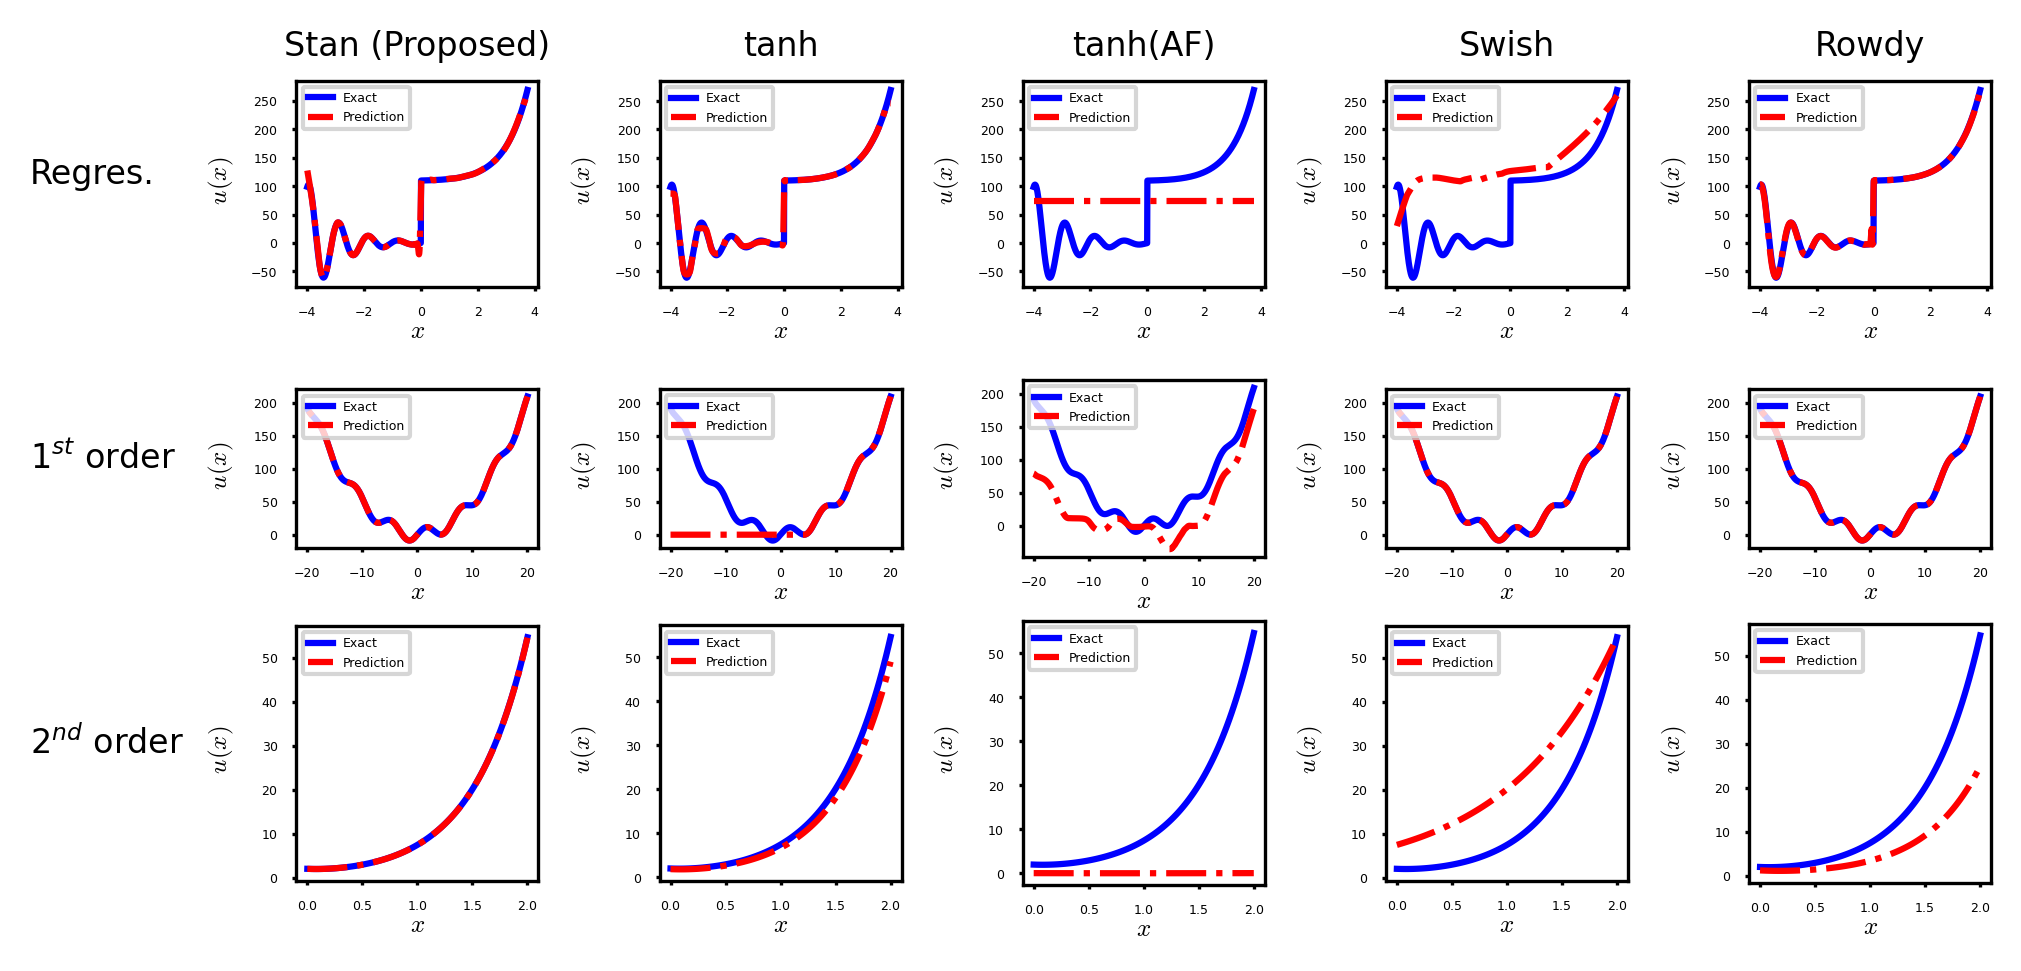

In [6]:
fig, axs = plt.subplots(3,5)
level_ind = 1

levels = ["low","medium","high"]
level = levels[level_ind]

rep_num = 0
scales = [1.0,10.0,50.0] #1.0,10.0,50.0
scale = scales[level_ind]

def true_disc(x): #[-4,3.75]
    y  = np.zeros((np.shape(x)[0],))
    
    y = 0.2*np.sin(6*x)*np.exp(-1*x)
    y[x>0] = 1 + 0.1*x[x>0]*np.exp(x[x>0]) + 10
    
    return scale*y


lb = np.array(-4.0)  # [-1. 0.]
ub = np.array(3.75) # [1.  0.99]

x = np.linspace(lb,ub,1000).reshape(-1,1)
y_true = true_disc(x)

x = torch.from_numpy(x)

ax = axs[0,:]

fig.dpi=300
fig.tight_layout()

folder_base = "./Regression/"

layers = np.array([1,50,50,50,50,1])
folder_names = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']
prob_name = "Regr_disc_"
plt_titles = ['Stan (Proposed)','tanh','tanh(AF)','Swish','Rowdy']

rowdy_terms = 2

PINNs = [Sequentialmodel_stan(layers),Sequentialmodel_tanh(layers),Sequentialmodel_atanh(layers,1.0),Sequentialmodel_swish(layers),Sequentialmodel_rowdy(layers,1.0,rowdy_terms)] 


for i in range(5):
    PINNs[i].load_state_dict(torch.load(folder_base + folder_names[i] + prob_name + algo_names[i] + '_' + level+'_'+str(rep_num)+'.pt'))

    y_pred = PINNs[i].forward(x).cpu().detach().numpy()
    
    ax[i].plot(x.cpu().detach().numpy(),y_true,'b',linewidth = 1.5,label = 'Exact')
    ax[i].plot(x.cpu().detach().numpy(),y_pred,'r-.',linewidth = 1.5,label = "Prediction")
    
    ax[i].set_title(plt_titles[i],fontsize=8, math_fontfamily='cm')
    
    ax[i].set_xlabel('$x$', fontsize=6, math_fontfamily='cm', labelpad=0.0)
    ax[i].set_ylabel(' $u(x)$',fontsize=6, math_fontfamily='cm', labelpad=0.0)
    
    ax[i].tick_params(axis='x', labelsize=3,length = 1)
    ax[i].tick_params(axis='y', labelsize=3,length = 1)
    
    ax[i].set_aspect(aspect = 0.02)
    
    ax[i].yaxis.set_label_coords(-0.25,0.5)
    
    ax[i].legend(prop={'size':3},loc = 'upper left')

    # ax[i].set_ylim([-300,1350])
    # ax[i].set_ylim([-500.0,1500.0])
    
    
#------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------

rep_num = 1
extents = [1.0,20.0,100.0]
extent = extents[level_ind]

def true_1D_FODE(x): #True function for 1D_1 dy/dx = cos(0.01*x) BC1: y(0)=0; x \in [-100,100]
    y = extent*np.sin(x)/2 + np.square(x)/2
    return y

x = np.linspace(extent,-1.0*extent,5000).reshape(-1,1)
y_true = true_1D_FODE(x)

lb = x[0]
ub = x[-1]


x = torch.from_numpy(x)


fig.dpi=300
fig.tight_layout()

folder_base = "./1D/FODE_mod/"

layers = np.array([1,50,50,50,1]) #9 hidden layers
folder_names = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']
prob_name = "1D_FODE_"
plt_titles = ['Stan (Proposed)','tanh','tanh(AF)','Swish','Rowdy']

rowdy_terms = 2

PINNs = [Sequentialmodel_stan(layers),Sequentialmodel_tanh(layers),Sequentialmodel_atanh(layers,3.0),Sequentialmodel_swish(layers),Sequentialmodel_rowdy(layers,8.0,rowdy_terms)] 

ax = axs[1,:]

R = 0

for i in range(5):
    PINNs[i].load_state_dict(torch.load(folder_base + folder_names[i] + prob_name + algo_names[i] + '_' + level+'_'+str(rep_num)+'.pt'))

    y_pred = PINNs[i].forward(x).cpu().detach().numpy()
    
    ax[i].plot(x.cpu().detach().numpy(),y_true,'b',linewidth = 1.5,label = 'Exact')
    ax[i].plot(x.cpu().detach().numpy(),y_pred,'r-.',linewidth = 1.5,label = "Prediction")
    
    # ax[i].set_title(plt_titles[i],fontsize=8, math_fontfamily='cm')
    
    ax[i].set_xlabel('$x$', fontsize=6, math_fontfamily='cm', labelpad=0.0)
    ax[i].set_ylabel(' $u(x)$',fontsize=6, math_fontfamily='cm', labelpad=0.0)
    
    ax[i].tick_params(axis='x', labelsize=3,length = 1)
    ax[i].tick_params(axis='y', labelsize=3,length = 1)
    
    ax[i].set_aspect(aspect = 0.12)
    
    ax[i].yaxis.set_label_coords(-0.25,0.5)
    
    ax[i].legend(prop={'size':3},loc = 'upper left')

    # ax[i].set_ylim([-300,1350])
    # ax[i].set_ylim([-1000.0,5500.0])
    
#------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------

rep_num = 3
coeffs1 = [1.0, 2.0, 3.0] 
coeffs2 = [-2.0, -3.0, -4.0] 

def true_1D_SODE(x): #True function for 1D_1 dy2/dx2 + dy/dx - 6y = 0; BC1: y(0)=2; BC2: dy/dx at (x=0) = -1;
    y = np.exp(coeffs1[level_ind]*x) + np.exp(coeffs2[level_ind]*x)
    return y

x = np.linspace(0,2,100).reshape(-1,1)
y_true = true_1D_SODE(x)

lb = x[0]
ub = x[-1]


x = torch.from_numpy(x)

fig.dpi=300
fig.tight_layout()

folder_base = "./1D/SODE/"

layers = np.array([1,50,50,50,50,50,50,50,50,50,1])
folder_names = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']
prob_name = "1D_SODE_"
plt_titles = ['Stan (Proposed)','tanh','tanh(AF)','Swish','Rowdy']

rowdy_terms = 2

PINNs = [Sequentialmodel_stan(layers),Sequentialmodel_tanh(layers),Sequentialmodel_atanh(layers,1.0),Sequentialmodel_swish(layers),Sequentialmodel_rowdy(layers,5.0,rowdy_terms)] 

ax = axs[2,:]

R = 0

for i in range(5):
    PINNs[i].load_state_dict(torch.load(folder_base + folder_names[i] + prob_name + algo_names[i] + '_' + level+'_'+str(rep_num)+'.pt'))

    y_pred = PINNs[i].forward(x).cpu().detach().numpy()
    
    ax[i].plot(x.cpu().detach().numpy(),y_true,'b',linewidth = 1.5,label = 'Exact')
    ax[i].plot(x.cpu().detach().numpy(),y_pred,'r-.',linewidth = 1.5,label = "Prediction")
    
    # ax[i].set_title(plt_titles[i],fontsize=8, math_fontfamily='cm')
    
    ax[i].set_xlabel('$x$', fontsize=6, math_fontfamily='cm', labelpad=0.0)
    ax[i].set_ylabel(' $u(x)$',fontsize=6, math_fontfamily='cm', labelpad=0.0)
    
    ax[i].tick_params(axis='x', labelsize=3,length = 1)
    ax[i].tick_params(axis='y', labelsize=3,length = 1)
    
    ax[i].set_aspect(aspect = 0.04)
    
    ax[i].yaxis.set_label_coords(-0.25,0.5)
    
    ax[i].legend(prop={'size':3},loc = 'upper left')

    # ax[i].set_ylim([-300,1350])
    # ax[i].set_ylim([-1000.0,5500.0])
plot_rows = ['Regres.','$1^{st}$ order','$2^{nd}$ order','(d)']

for i in range(3):
    # axs[i,0].text(-0.7,0.5,plot_rows[i],fontsize=8,transform=axs[i,0].transAxes)
    axs[i,0].text(-1.1,0.5,plot_rows[i],fontsize=8,transform=axs[i,0].transAxes)

# fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.2, hspace=-0.7)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=-0.60)
# plt.savefig('Num_predictions_' + level+ '.pdf', format='pdf',pad_inches=0, bbox_inches='tight')
plt.savefig('Num_predictions_' + level+ '.svg', format='svg',pad_inches=0, bbox_inches='tight')